In [2]:
#Analytics done using: https://github.com/chris-greening/instascrape/blob/master/tutorial/examples/DonaldTrump/Donald%20Trump.ipynb



In [12]:
#Libraries
from selenium.webdriver import Chrome
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from instascrape import Profile, scrape_posts
import os
import wget
from bs4 import BeautifulSoup
from instascrape import Post
import pandas as pd 
import numpy as np

In [14]:
#opening webdriver
webdriver = Chrome(r'/Users/athiyarastogi/Desktop/chromedriver')

In [16]:

headers = {
    "user-agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Mobile Safari/537.36 Edg/87.0.664.57",
    "cookie": "sessionid=44118920547%3AiQsSexd01vtrlP%3A23;"
}

helen = Profile("helenowen")
helen.scrape(headers=headers)
print(helen)

<Profile>


In [17]:
posts = helen.get_posts(webdriver=webdriver, login_first=False)

In [51]:
#The previous function imported total number of posts - 1409 from Helen Owen's account

print(len(posts))

1409


In [52]:
posts = helen.get_posts(webdriver=webdriver, amount= 100, login_first=False)

In [54]:
#Scraping data for 100 results: 9:30-11:15 am (1 hr 45 minutes)

scraped_posts, unscraped_posts = scrape_posts(posts, headers=headers, pause=2, silent=False)

0: CKznLsKDnk_ - 2021-02-02 17:23:31
1: CKr_SqkDK2W - 2021-01-30 18:20:15
2: CKm1_Thj-ac - 2021-01-28 18:22:19
3: CKkFE5SjuhD - 2021-01-27 16:36:26
4: CKUV8xlj3HL - 2021-01-21 13:56:01
5: CKP1NQLDJE8 - 2021-01-19 19:52:57
6: CKMqwKwje68 - 2021-01-18 14:24:49
7: CKKOhA1jeLE - 2021-01-17 15:38:39
8: CJ641LLj0GE - 2021-01-11 16:40:34
9: CJ4lPRGDVRp - 2021-01-10 19:10:53
10: CJrfHOija3R - 2021-01-05 17:07:14
11: CJhLtDrjGju - 2021-01-01 17:05:14
12: CJUh48-jGLC - 2020-12-27 19:08:58
13: CJRVABTDs3e - 2020-12-26 13:19:38
14: CJMoe4SjQU6 - 2020-12-24 17:32:39
15: CJCGUI_ja09 - 2020-12-20 15:21:41
16: CI_uYMhDxuh - 2020-12-19 17:14:31
17: CI87Gpfj-Rv - 2020-12-18 15:07:45
18: CI4IvgajsGL - 2020-12-16 18:30:29
19: CI1mVaajAGm - 2020-12-15 18:51:21
20: CIy3KGVjKKs - 2020-12-14 17:20:38
21: CIwnV5IDX93 - 2020-12-13 20:23:57
22: CItzAzrjGGv - 2020-12-12 18:08:12
23: CIql6wvjqwF - 2020-12-11 12:16:04
24: CIoFGjqDNC9 - 2020-12-10 12:50:50
25: CIjwebLjQ9l - 2020-12-08 20:33:38
26: CIg9Uq6DaHB - 2020

In [144]:
# Done using this link: https://dev.to/chrisgreening/visualizing-instagram-engagement-with-instascrape-326h

posts_data = [post.to_dict() for post in scraped_posts]
posts_df = pd.DataFrame(posts_data)
extract_df=posts_df[['upload_date', 'comments', 'likes', 'caption', 'hashtags', 'location', 'shortcode', 'video_url', 'video_view_count', 'tagged_users' ]]
print(posts_df[['upload_date', 'comments', 'likes', 'caption', 'hashtags', 'location', 'shortcode', 'video_url', 'video_view_count', 'tagged_users' ]])


           upload_date  comments  likes  \
0  2021-02-02 17:23:31       202  28551   
1  2021-01-30 18:20:15       296  49493   
2  2021-01-28 18:22:19       211  51055   
3  2021-01-27 16:36:26       279  43287   
4  2021-01-21 13:56:01       243  47560   
..                 ...       ...    ...   
95 2020-08-07 14:30:15       225  49980   
96 2020-08-06 13:09:41        76  27020   
97 2020-08-05 19:46:17       255  41652   
98 2020-08-01 22:37:08       160  63181   
99 2020-07-31 23:08:26       336  51628   

                                              caption  \
0   How it felt to clean out my closet.... (contra...   
1   Omw to the couch. Set from @revolve #revolvewi...   
2   The fact that this is 2 hours from our house i...   
3   This is why I haven’t posted to Instagram in a...   
4   Partially on a neighborhood stroll partially s...   
..                                                ...   
95                          Triple shot of sunshine 🔅   
96                         

In [145]:
extract_df.to_csv('helenowen100.csv')


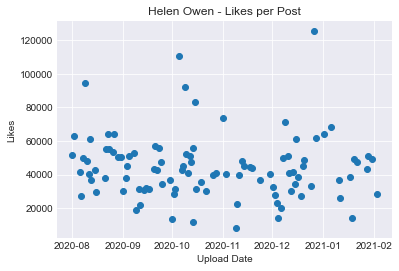

In [68]:


import matplotlib.pyplot as plt 

plt.style.use('seaborn-darkgrid')      # Stylistic change

plt.scatter(posts_df.upload_date, posts_df.likes)  # Plot the data
plt.xlabel('Upload Date')              # Write labels
plt.ylabel('Likes')
plt.title('Helen Owen - Likes per Post')
plt.show()        

In [70]:
pip install -U scikit-learn scipy matplotlib

     |████████████████████████████████| 7.3 MB 606 kB/s 
     |████████████████████████████████| 30.9 MB 7.7 MB/s 
     |████████████████████████████████| 302 kB 19.9 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [76]:

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()      
sc_y = StandardScaler()

# Convert a 1D numpy array into a 2D column-like array. 
def two_dimensionalize(arr): return arr.reshape((len(arr), 1))

# StandardScaler.fit_transform expects a 2D-array. 
x_dt = posts_df['timestamp'].to_numpy()
x_dt = two_dimensionalize(x_dt)
y_dt = posts_df['likes'].to_numpy()
y_dt = two_dimensionalize(y_dt)

# Feature scaling to get data on same scale.
x_transform = sc_x.fit_transform(x_dt)
y_transform = sc_y.fit_transform(y_dt)


In [78]:
from sklearn.preprocessing import PolynomialFeatures

#Further scaling for IV.
polyreg = PolynomialFeatures(degree=6)
x_poly = polyreg.fit_transform(x_transform)

In [80]:
from sklearn.linear_model import LinearRegression
import numpy as np

#Create and fit polynomial regression. 
regressor = LinearRegression()
regressor.fit(x_poly, y_transform)

#Calculate predictions from the model for every independant variable data point.  
y_predict = np.array([regressor.predict([val]) for val in x_poly])
y_predict = two_dimensionalize(y_predict)
y_final = sc_y.inverse_transform(y_predict)
y_final = y_final.flatten()

In [55]:
#scrapes the last 9 posts that are not videos. These would be useful to understand the genre of content the influencer has been creating recently and if it will match the theme of a brand.

recents = helen.get_recent_posts()
helen_photos = [post for post in recents if not post.is_video]

In [81]:
import datetime

import matplotlib.pyplot as plt
import matplotlib

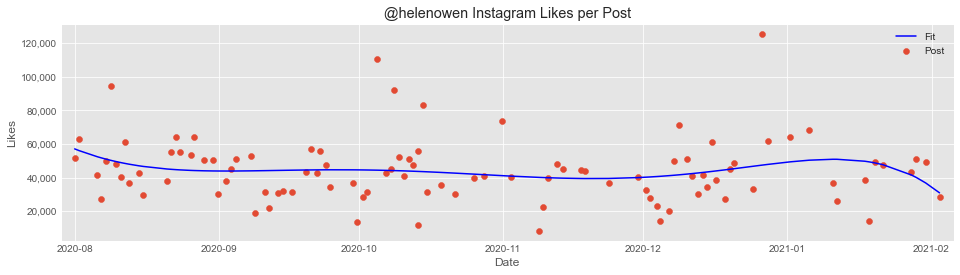

In [97]:

#Visualizing our data - Now with our data and polynomial regression, we can create a scatter plot to visualize user engagement over the last few months.

# Create plot and style. 
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(16,4))

# Draw scatter plot.
upload_date = posts_df["upload_date"].to_numpy()
likes = posts_df["likes"].to_numpy()
ax.scatter(upload_date, likes, label="Post")


# Draw polynomial regression.
ax.plot(upload_date, y_final, label='Fit', color="blue")


# Set plot x-bounds. 
left_xlim=posts_df["upload_date"].min()-datetime.timedelta(days=3)
right_xlim=posts_df["upload_date"].max()+datetime.timedelta(days=3)
ax.set_xlim(left=left_xlim, right=right_xlim)

# Draw labels on plot. 
ax.set_title("@helenowen Instagram Likes per Post")
ax.set_xlabel("Date")
ax.set_ylabel("Likes")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Format and draw plot legend.
handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1]]
labels = [labels[0], labels[1]]
ax.legend(handles,labels, loc=1);






In [101]:
#Analyzing tagged locations


locations_df = posts_df[posts_df["location"].notna()]
locations_count = locations_df["location"].value_counts()
locations_count

West Hollywood, California                      8
Lake Tahoe, California                          8
Lake Powell, Utah                               5
Ventana Big Sur                                 4
Cabo San Lucas, Baja California Sur             4
Newport Beach, California                       4
Carmel Valley Ranch                             3
Los Angeles, California                         3
Santa Barbara, California                       2
Esperanza, Auberge Resorts Collection           2
Healdsburg, Sonoma County                       2
Big Bear Mountain, CA                           1
Malibu, California                              1
1 Hotel West Hollywood                          1
Fort Funston State Park Beach, San Francisco    1
Devil's Bridge, Sedona, AZ                      1
Big Sur, California                             1
Name: location, dtype: int64

Text(0.5, 1.0, "Helen's Tagged Locations")

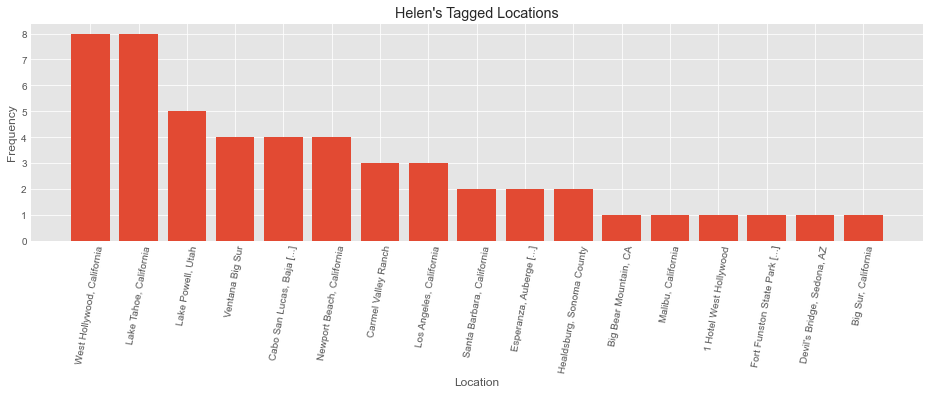

In [104]:
from textwrap import shorten

# Create the figure 
fig, ax = plt.subplots(figsize=(16,4), facecolor='w')

# Draw the bar plot
locations = locations_count.index.to_list()
formatted_locations = [shorten(loc, width=30) for loc in locations]
frequency = locations_count.to_list()
ax.bar(formatted_locations, frequency)

# Draw the labels 
ax.set_xlabel("Location")
plt.xticks(rotation=80)
ax.set_ylabel("Frequency")
ax.set_title("Helen's Tagged Locations")

In [105]:
#Analyzing other tagged accounts

tagged_df = posts_df[posts_df["tagged_users"].str.len() != 0]
tagged_df["tagged_users"].explode().value_counts()


zackkalter                18
whitneyfransway            8
feat                       7
avantstay                  7
revolve                    6
amandapandapaige           6
alyssalynch                5
the.phlow                  5
fabletics                  4
samiclarke                 4
mondayswimwear             3
ventanabigsur              3
carmelvranch               3
tianaharaguchi             3
onia                       3
nobread                    3
cordova.co                 2
pvolve                     2
paige                      2
colgate                    2
esperanzaresort            2
bliss.beach                2
solidandstriped            2
glennellishair             2
beginningboutique          2
lunya                      1
robertgraham               1
mackenziealtig             1
violafloral                1
hotelcalifornian           1
thepangaia                 1
shopredone                 1
zara                       1
lauramercier               1
senreve       

In [109]:
percent_tagged = len(tagged_df)/len(posts_df)
print(f"Helen Owen tagged other accounts in {percent_tagged:.2%} of her recent posts.")

Helen Owen tagged other accounts in 67.00% of her recent posts.


In [112]:
shortcode = tagged_df.iloc[3]['shortcode']
print(f"https://www.instagram.com/p/{shortcode}/")

https://www.instagram.com/p/CKMqwKwje68/


In [113]:
#Video Views

videos_df = posts_df[posts_df["is_video"]]
videos_df["video_view_count"]

0      248550.0
1      407958.0
6      168219.0
13    2313629.0
16     457660.0
17     211200.0
28     127263.0
40     114046.0
50      76688.0
61      90611.0
74     191450.0
77     394537.0
79     188207.0
Name: video_view_count, dtype: float64

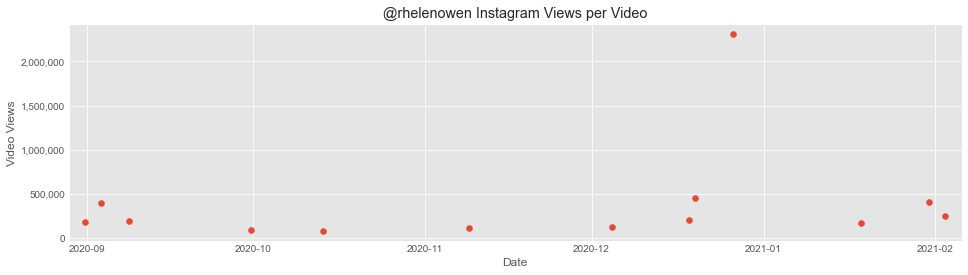

In [116]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(16,4), facecolor='w')

# Draw scatter plot and vertical line 
upload_date = videos_df['upload_date'].to_numpy()
view_count = videos_df['video_view_count'].to_numpy()
ax.scatter(upload_date, view_count, label="Video Post")

# Set plot x-bounds. 
left_xlim=videos_df["upload_date"].min()-datetime.timedelta(days=3)
right_xlim=videos_df["upload_date"].max()+datetime.timedelta(days=3)
ax.set_xlim(left=left_xlim, right=right_xlim)

# Draw labels onto plot 
ax.set_title("@rhelenowen Instagram Views per Video")
ax.set_xlabel("Date")
ax.set_ylabel("Video Views")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [117]:
#Analyzing Helen's Hastags

hashtags_df = posts_df[posts_df["hashtags"].str.len() != 0]
hashtags_count = hashtags_df["hashtags"].explode().value_counts()
hashtags_count

revolvewinter          5
fableticsambassador    4
WhiteningThatWorks     2
alwaysauberge          2
ColgatePartner         2
nomakeup               1
REVOLVEwinter          1
housetour              1
pvolvepartner          1
travel                 1
lauramercierpartner    1
farmtobeauty           1
closet                 1
juicebeauty            1
closetorganization     1
lakepowell             1
juicebeautypartner     1
Name: hashtags, dtype: int64

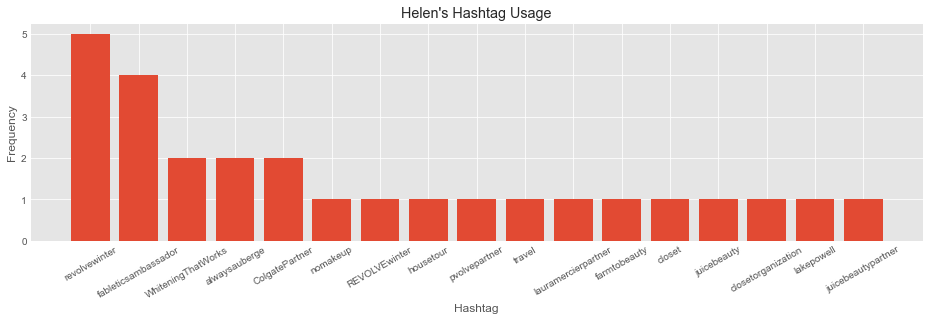

In [121]:
# Create the figure. 
fig, ax = plt.subplots(figsize=(16,4), facecolor="w")

# Draw the bar plot. 
hashtags = hashtags_count.index.to_list()
frequency = hashtags_count.to_list()
ax.bar(hashtags, frequency)

# Draw the labels. 
ax.set_xlabel("Hashtag")
plt.xticks(rotation=30)
ax.set_ylabel("Frequency")
ax.set_title("Helen's Hashtag Usage");

In [18]:
#saves recent posts in jpg form.

for post in helen_photos: 
    fname = post.upload_date.strftime("%Y-%m-%d %Hh%Mm")
    post.download(f"{fname}.png")